<a href="https://colab.research.google.com/github/TaniaNaum/-/blob/main/%D0%93%D1%80%D0%B0%D1%84%D0%B8%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

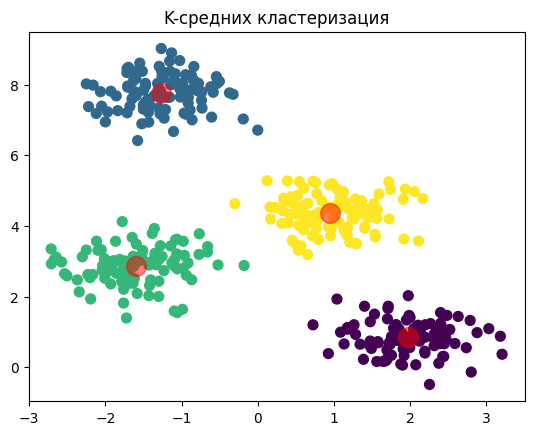

In [6]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Генерация случайных данных
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.50, random_state=0)

# Функция для вычисления кластеров с использованием k-средних
def k_means(X, k=4, max_iterations=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iterations):
        # Присваиваем каждую точку к ближайшему центроиду
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        # Пересчитываем центроиды
        new_centroids = np.array([X[labels == i].mean(0) for i in range(k)])
        # Проверяем сходимость
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Применение функции k-средних
centroids, labels = k_means(X)

# Визуализация результата
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='red', alpha=0.5)
plt.title("Кластеризация средняя")
plt.show()
